Simulate 12 lead

In [28]:
#Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 9]

# Simulate 30 seconds of ECG Signal (recorded at 250 samples / second)
ecg_signal = nk.ecg_simulate(duration=30, sampling_rate=360, method="multileads")

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

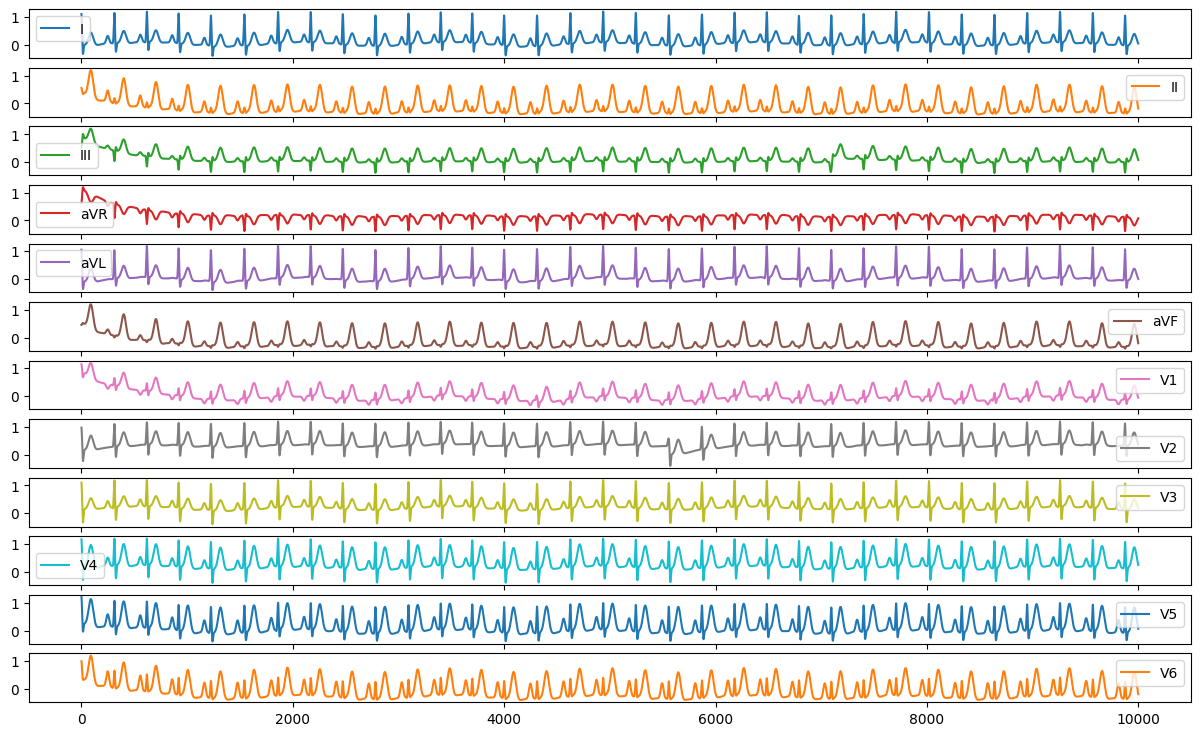

In [29]:
# Visualize results of all 12 leads
ecg_signal[0:10000].plot(subplots=True)

Separar las dos señales

In [30]:
signal_II = ecg_signal["II"]  
signal_V5 = ecg_signal["V5"]

Procesando las señales

In [31]:
### Lead II
# Automatically process the (raw) ECG signal
signals_II, info_II = nk.ecg_process(signal_II, sampling_rate=360)
# Extract clean ECG and R-peaks location
rpeaks_II = info_II["ECG_R_Peaks"]
cleaned_ecg_II = signals_II["ECG_Clean"]

### Lead V5
signals_V5, info_V5 = nk.ecg_process(signal_V5, sampling_rate=360)
rpeaks_V5 = info_V5["ECG_R_Peaks"]
cleaned_ecg_V5 = signals_V5["ECG_Clean"]

In [32]:
valid_indices_II = rpeaks_II[rpeaks_II < len(cleaned_ecg_II)]
r_peak_amplitudes_II = cleaned_ecg_II[valid_indices_II]

valid_indices_V5 = rpeaks_V5[rpeaks_V5 < len(cleaned_ecg_V5)]
r_peak_amplitudes_V5 = cleaned_ecg_V5[valid_indices_V5]

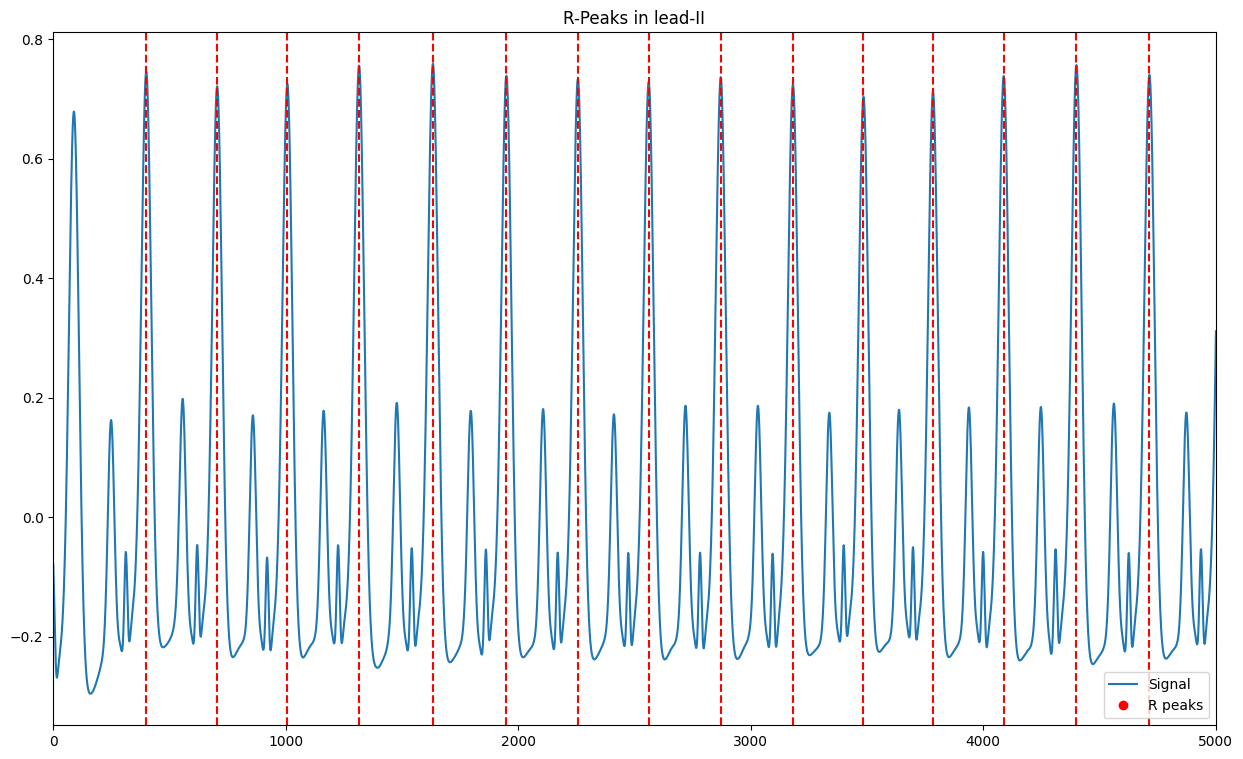

In [33]:
# Visualize R-peaks in ECG signal II
plot = nk.events_plot(rpeaks_II, cleaned_ecg_II)

plt.xlim(0, 5000)
plt.plot([], [], 'ro', label="R peaks")
plt.legend() 
plt.title("R-Peaks in lead-II")
plt.show()

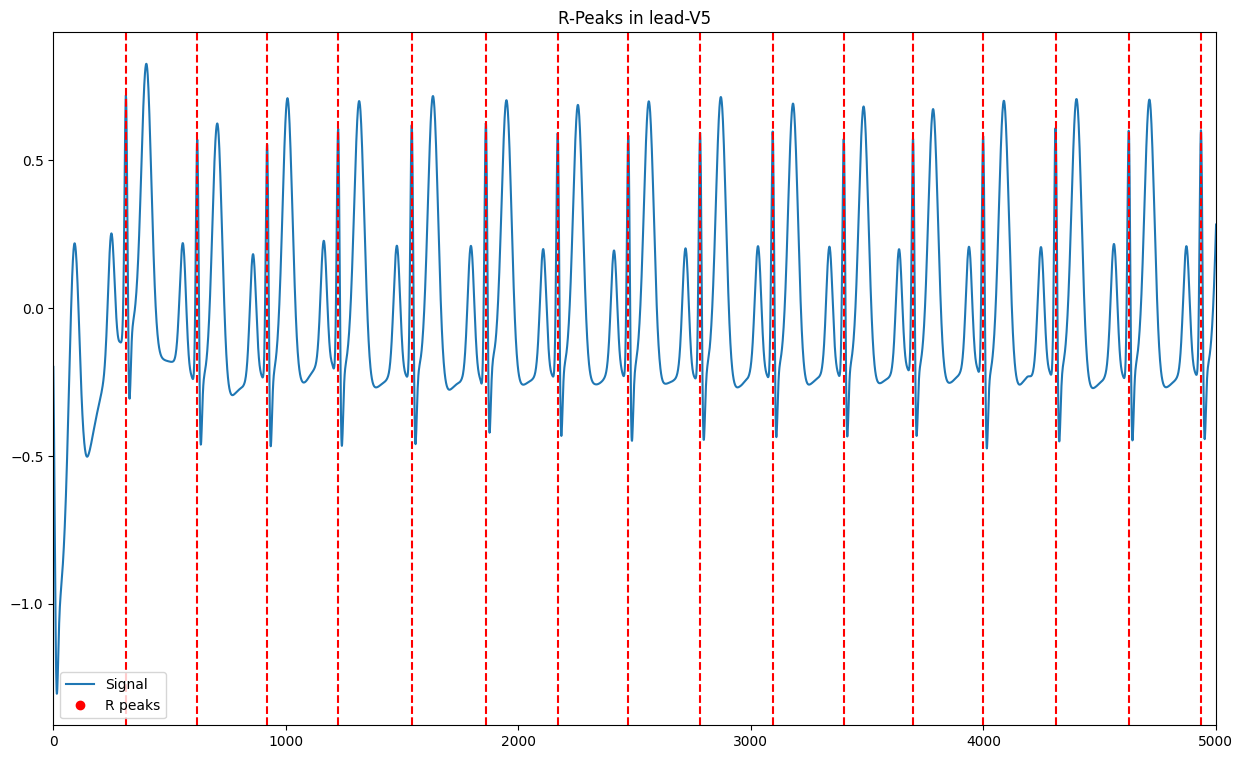

In [34]:
# Visualize R-peaks in ECG signal V5
plot = nk.events_plot(rpeaks_V5, cleaned_ecg_V5)

plt.xlim(0, 5000)
plt.plot([], [], 'ro', label="R peaks")
plt.legend() 
plt.title("R-Peaks in lead-V5")
plt.show()

Text(0.5, 1.0, 'Gráfica TPQS para la señal del Lead-II')

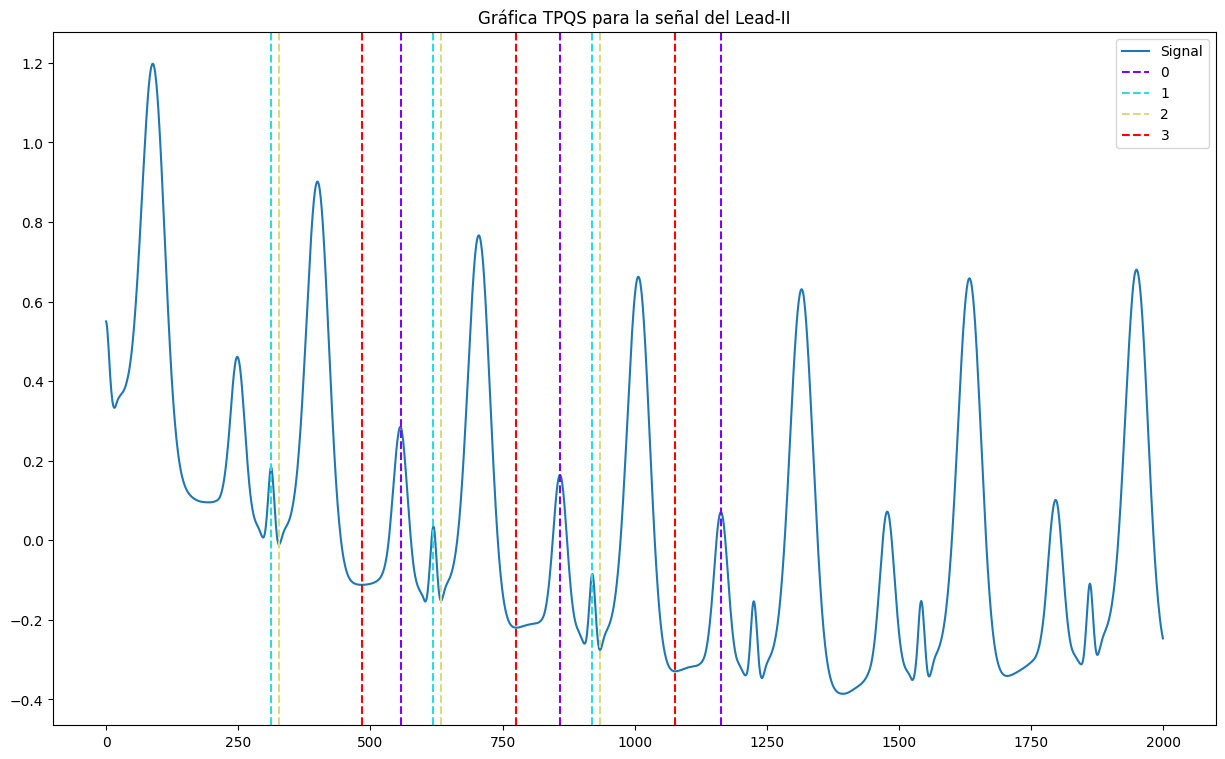

In [60]:
# Delineate the ECG signal
_, waves_peak_II = nk.ecg_delineate(signal_II, rpeaks_II, sampling_rate=360, method="peak")

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak_II['ECG_T_Peaks'][:3], 
                       waves_peak_II['ECG_P_Peaks'][:3],
                       waves_peak_II['ECG_Q_Peaks'][:3],
                       waves_peak_II['ECG_S_Peaks'][:3]], signal_II[:2000])

plt.title("Gráfica TPQS para la señal del Lead-II")

Text(0.5, 1.0, 'Gráfica TPQS para el Lead-V5')

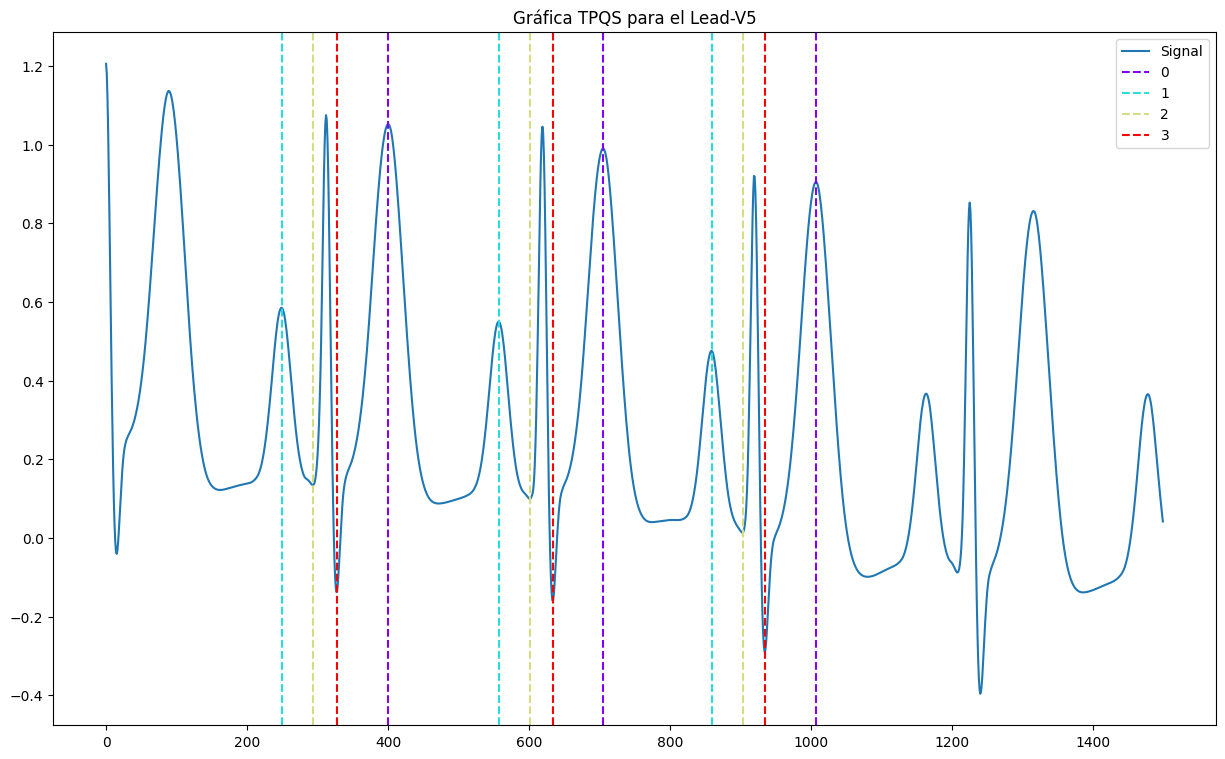

In [36]:
# Delineate the ECG signal
_, waves_peak_V5 = nk.ecg_delineate(signal_V5, rpeaks_V5, sampling_rate=360, method="peak")

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak_V5['ECG_T_Peaks'][:3], 
                       waves_peak_V5['ECG_P_Peaks'][:3],
                       waves_peak_V5['ECG_Q_Peaks'][:3],
                       waves_peak_V5['ECG_S_Peaks'][:3]], signal_V5[:1500])

plt.title("Gráfica TPQS para el Lead-V5")

Text(0.5, 1.0, 'Gráfica RTPQS para la señal del Lead-II')

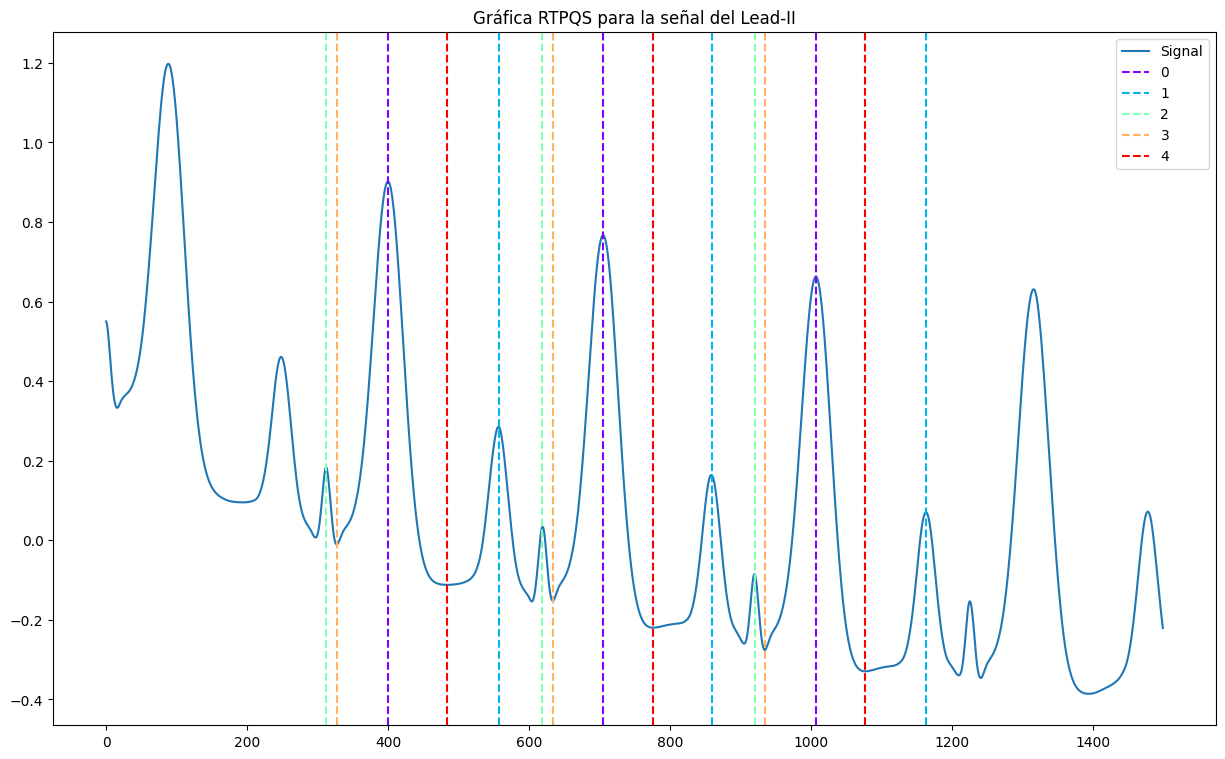

In [37]:
# Delineate the ECG signal
_, waves_peak_II = nk.ecg_delineate(signal_II, rpeaks_II, sampling_rate=360, method="peak")

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([rpeaks_II[:3],
                       waves_peak_II['ECG_T_Peaks'][:3], 
                       waves_peak_II['ECG_P_Peaks'][:3],
                       waves_peak_II['ECG_Q_Peaks'][:3],
                       waves_peak_II['ECG_S_Peaks'][:3]], signal_II[:1500])

plt.title("Gráfica RTPQS para la señal del Lead-II")

Text(0.5, 1.0, 'Gráfica RTPQS para el Lead-V5')

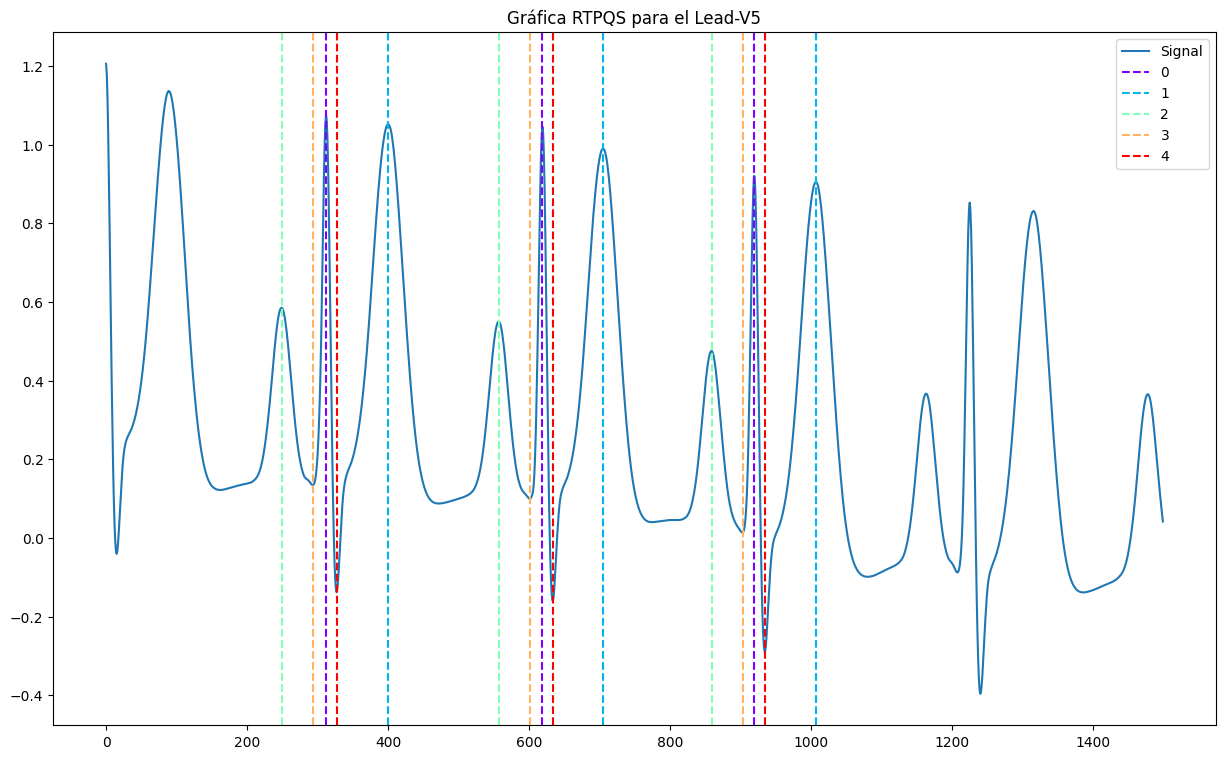

In [38]:
# Delineate the ECG signal
_, waves_peak_V5 = nk.ecg_delineate(signal_V5, rpeaks_V5, sampling_rate=360, method="peak")

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([rpeaks_V5[:3],
                       waves_peak_V5['ECG_T_Peaks'][:3], 
                       waves_peak_V5['ECG_P_Peaks'][:3],
                       waves_peak_V5['ECG_Q_Peaks'][:3],
                       waves_peak_V5['ECG_S_Peaks'][:3]], signal_V5[:1500])

plt.title("Gráfica RTPQS para el Lead-V5")

In [39]:
## Almacenar los picos del lead-II
# Store the peaks
t_peaks_II = waves_peak_II['ECG_T_Peaks']
p_peaks_II = waves_peak_II['ECG_P_Peaks']
q_peaks_II = waves_peak_II['ECG_Q_Peaks']
s_peaks_II = waves_peak_II['ECG_S_Peaks']

# Remove nan values from peak lists before indexing
t_peaks_II = [x for x in t_peaks_II if not np.isnan(x)]
p_peaks_II = [x for x in p_peaks_II if not np.isnan(x)]
q_peaks_II = [x for x in q_peaks_II if not np.isnan(x)]
s_peaks_II = [x for x in s_peaks_II if not np.isnan(x)]

# Convert peak lists to integers for indexing
t_peaks_II = [int(x) for x in t_peaks_II]
p_peaks_II = [int(x) for x in p_peaks_II]
q_peaks_II = [int(x) for x in q_peaks_II]
s_peaks_II = [int(x) for x in s_peaks_II]

# Get the amplitudes of the different waves
t_peak_amplitudes_II = cleaned_ecg_II[t_peaks_II]
p_peak_amplitudes_II = cleaned_ecg_II[p_peaks_II]
q_peak_amplitudes_II = cleaned_ecg_II[q_peaks_II]
s_peak_amplitudes_II = cleaned_ecg_II[s_peaks_II]

In [40]:
## Almacenar los picos del lead-V5
# Store the peaks
t_peaks_V5 = waves_peak_V5['ECG_T_Peaks']
p_peaks_V5 = waves_peak_V5['ECG_P_Peaks']
q_peaks_V5 = waves_peak_V5['ECG_Q_Peaks']
s_peaks_V5 = waves_peak_V5['ECG_S_Peaks']

# Remove nan values from peak lists before indexing
t_peaks_V5 = [x for x in t_peaks_V5 if not np.isnan(x)]
p_peaks_V5 = [x for x in p_peaks_V5 if not np.isnan(x)]
q_peaks_V5 = [x for x in q_peaks_V5 if not np.isnan(x)]
s_peaks_V5 = [x for x in s_peaks_V5 if not np.isnan(x)]

# Convert peak lists to integers for indexing
t_peaks_V5 = [int(x) for x in t_peaks_V5]
p_peaks_V5 = [int(x) for x in p_peaks_V5]
q_peaks_V5 = [int(x) for x in q_peaks_V5]
s_peaks_V5 = [int(x) for x in s_peaks_V5]

# Get the amplitudes of the different waves
t_peak_amplitudes_V5 = cleaned_ecg_V5[t_peaks_V5]
p_peak_amplitudes_V5 = cleaned_ecg_V5[p_peaks_V5]
q_peak_amplitudes_V5 = cleaned_ecg_V5[q_peaks_V5]
s_peak_amplitudes_V5 = cleaned_ecg_V5[s_peaks_V5]

In [41]:
# Calculate intervals (in seconds) for lead-II
sampling_rate = 360  # Your sampling rate

# QRS intervals for lead-II
qrs_intervals_II = [(s_peaks_II[i] - q_peaks_II[i]) / sampling_rate for i in range(min(len(q_peaks_II), len(s_peaks_II)))]
pq_intervals_II = [(q_peaks_II[i] - p_peaks_II[i]) / sampling_rate for i in range(min(len(p_peaks_II), len(q_peaks_II)))]
qt_intervals_II = [(t_peaks_II[i] - q_peaks_II[i]) / sampling_rate for i in range(min(len(q_peaks_II), len(t_peaks_II)))]
st_intervals_II = [(t_peaks_II[i] - s_peaks_II[i]) / sampling_rate for i in range(min(len(s_peaks_II), len(t_peaks_II)))]

In [42]:
# Calculate intervals (in seconds) for lead-V5

# QRS intervals for lead-V5
qrs_intervals_V5 = [(s_peaks_V5[i] - q_peaks_V5[i]) / sampling_rate for i in range(min(len(q_peaks_V5), len(s_peaks_V5)))]
pq_intervals_V5 = [(q_peaks_V5[i] - p_peaks_V5[i]) / sampling_rate for i in range(min(len(p_peaks_V5), len(q_peaks_V5)))]
qt_intervals_V5 = [(t_peaks_V5[i] - q_peaks_V5[i]) / sampling_rate for i in range(min(len(q_peaks_V5), len(t_peaks_V5)))]
st_intervals_V5 = [(t_peaks_V5[i] - s_peaks_V5[i]) / sampling_rate for i in range(min(len(s_peaks_V5), len(t_peaks_V5)))]

In [43]:
# Store the R-peaks for lead-II
r_peaks_II = info_II["ECG_R_Peaks"]

# Remove nan values from peak lists and convert to integers
def clean_peaks(peaks):
    peaks = [x for x in peaks if not np.isnan(x)]
    peaks = [int(x) for x in peaks]
    return peaks

# Remove nan values and convert to integers
r_peaks_II = clean_peaks(r_peaks_II)

# Calculate RR intervals (in seconds) for lead-II
rr_intervals_II = [(r_peaks_II[i + 1] - r_peaks_II[i]) / sampling_rate for i in range(len(r_peaks_II) - 1)]

# Print the RR intervals for each heartbeat
for i, interval in enumerate(rr_intervals_II):
    print(f"Heartbeat {i + 1}: RR interval (II)= {interval:.3f} seconds")

Heartbeat 1: RR interval (II)= 0.847 seconds
Heartbeat 2: RR interval (II)= 0.839 seconds
Heartbeat 3: RR interval (II)= 0.858 seconds
Heartbeat 4: RR interval (II)= 0.878 seconds
Heartbeat 5: RR interval (II)= 0.881 seconds
Heartbeat 6: RR interval (II)= 0.856 seconds
Heartbeat 7: RR interval (II)= 0.844 seconds
Heartbeat 8: RR interval (II)= 0.861 seconds
Heartbeat 9: RR interval (II)= 0.864 seconds
Heartbeat 10: RR interval (II)= 0.842 seconds
Heartbeat 11: RR interval (II)= 0.831 seconds
Heartbeat 12: RR interval (II)= 0.844 seconds
Heartbeat 13: RR interval (II)= 0.869 seconds
Heartbeat 14: RR interval (II)= 0.872 seconds
Heartbeat 15: RR interval (II)= 0.861 seconds
Heartbeat 16: RR interval (II)= 0.861 seconds
Heartbeat 17: RR interval (II)= 0.867 seconds
Heartbeat 18: RR interval (II)= 0.867 seconds
Heartbeat 19: RR interval (II)= 0.856 seconds
Heartbeat 20: RR interval (II)= 0.847 seconds
Heartbeat 21: RR interval (II)= 0.844 seconds
Heartbeat 22: RR interval (II)= 0.850 secon

In [44]:
# Store the R-peaks for lead-V5
r_peaks_V5 = info_V5["ECG_R_Peaks"]

# Remove nan values and convert to integers
r_peaks_V5 = clean_peaks(r_peaks_V5)

# Calculate RR intervals (in seconds) for lead-V5
rr_intervals_V5 = [(r_peaks_V5[i + 1] - r_peaks_V5[i]) / sampling_rate for i in range(len(r_peaks_V5) - 1)]

# Print the RR intervals for each heartbeat
for i, interval in enumerate(rr_intervals_V5):
    print(f"Heartbeat {i + 1}: RR interval (V5)= {interval:.3f} seconds")

Heartbeat 1: RR interval (V5)= 0.853 seconds
Heartbeat 2: RR interval (V5)= 0.833 seconds
Heartbeat 3: RR interval (V5)= 0.850 seconds
Heartbeat 4: RR interval (V5)= 0.881 seconds
Heartbeat 5: RR interval (V5)= 0.883 seconds
Heartbeat 6: RR interval (V5)= 0.858 seconds
Heartbeat 7: RR interval (V5)= 0.844 seconds
Heartbeat 8: RR interval (V5)= 0.858 seconds
Heartbeat 9: RR interval (V5)= 0.867 seconds
Heartbeat 10: RR interval (V5)= 0.850 seconds
Heartbeat 11: RR interval (V5)= 0.831 seconds
Heartbeat 12: RR interval (V5)= 0.833 seconds
Heartbeat 13: RR interval (V5)= 0.867 seconds
Heartbeat 14: RR interval (V5)= 0.872 seconds
Heartbeat 15: RR interval (V5)= 0.864 seconds
Heartbeat 16: RR interval (V5)= 0.858 seconds
Heartbeat 17: RR interval (V5)= 0.867 seconds
Heartbeat 18: RR interval (V5)= 0.872 seconds
Heartbeat 19: RR interval (V5)= 0.856 seconds
Heartbeat 20: RR interval (V5)= 0.847 seconds
Heartbeat 21: RR interval (V5)= 0.847 seconds
Heartbeat 22: RR interval (V5)= 0.847 secon

In [45]:
# Calculate time between first R-peak and start of signal
time_to_first_r_peak_II = r_peaks_II[0] / sampling_rate  # Time in seconds
time_to_first_r_peak_V5 = r_peaks_V5[0] / sampling_rate

In [52]:
import pandas as pd

# Create a list of dictionaries to store the data
data = []
for i in range(len(rr_intervals_II)):
    data.append({
        "Pre-RR_II": time_to_first_r_peak_II if i == 0 else rr_intervals_II[i - 1],  # Use time_to_first_r_peak for the first row
        "Post-RR_II": rr_intervals_II[i],
        "P-peak_II": p_peak_amplitudes_II.iloc[i] if i < len(p_peak_amplitudes_II) else None,  # Handle cases where peak lists have different lengths
        "T-Peak_II": t_peak_amplitudes_II.iloc[i] if i < len(t_peak_amplitudes_II) else None,
        "R-Peak_II": r_peak_amplitudes_II.iloc[i] if i < len(r_peak_amplitudes_II) else None,
        "S-Peak_II": s_peak_amplitudes_II.iloc[i] if i < len(s_peak_amplitudes_II) else None,
        "Q-Peak_II": q_peak_amplitudes_II.iloc[i] if i < len(q_peak_amplitudes_II) else None,
        "QRS-interval_II": qrs_intervals_II[i] if i < len(qrs_intervals_II) else None,
        "PQ-Interval_II": pq_intervals_II[i] if i < len(pq_intervals_II) else None,
        "QT-Interval_II": qt_intervals_II[i] if i < len(qt_intervals_II) else None,
        "ST-Interval_II": st_intervals_II[i] if i < len(st_intervals_II) else None,
    })

for i in range(len(rr_intervals_V5)):
    data.append({
        "Pre-RR": time_to_first_r_peak_V5 if i == 0 else rr_intervals_V5[i - 1],  # Use time_to_first_r_peak for the first row
        "Post-RR": rr_intervals_V5[i],
        "P-peak": p_peak_amplitudes_V5.iloc[i] if i < len(p_peak_amplitudes_V5) else None,  # Handle cases where peak lists have different lengths
        "T-Peak": t_peak_amplitudes_V5.iloc[i] if i < len(t_peak_amplitudes_V5) else None,
        "R-Peak": r_peak_amplitudes_V5.iloc[i] if i < len(r_peak_amplitudes_V5) else None,
        "S-Peak": s_peak_amplitudes_V5.iloc[i] if i < len(s_peak_amplitudes_V5) else None,
        "Q-Peak": q_peak_amplitudes_V5.iloc[i] if i < len(q_peak_amplitudes_V5) else None,
        "QRS-interval": qrs_intervals_V5[i] if i < len(qrs_intervals_V5) else None,
        "PQ-Interval": pq_intervals_V5[i] if i < len(pq_intervals_V5) else None,
        "QT-Interval": qt_intervals_V5[i] if i < len(qt_intervals_V5) else None,
        "ST-Interval": st_intervals_V5[i] if i < len(st_intervals_V5) else None,
    })

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Export the DataFrame to a CSV file
df.to_csv("ecg_data_testII_V5.csv", index=False)  # Set index=False to avoid writing row numbers

In [59]:
import pandas as pd

data = []

num_heartbeats = min(len(rr_intervals_II), len(rr_intervals_V5))  # Número de latidos a considerar

for i in range(num_heartbeats):
    data_row = {}  # Diccionario para almacenar los datos de un latido

    # Datos del Lead II
    data_row["0_pre-RR"] = time_to_first_r_peak_II if i == 0 else rr_intervals_II[i - 1]
    data_row["0_post-RR"] = rr_intervals_II[i]
    data_row["0_pPeak"] = p_peak_amplitudes_II.iloc[i] if i < len(p_peak_amplitudes_II) else None
    data_row["0_tPeak"] = t_peak_amplitudes_II.iloc[i] if i < len(t_peak_amplitudes_II) else None
    data_row["0_rPeak"] = r_peak_amplitudes_II.iloc[i] if i < len(r_peak_amplitudes_II) else None
    data_row["0_sPeak"] = s_peak_amplitudes_II.iloc[i] if i < len(s_peak_amplitudes_II) else None
    data_row["0_qPeak"] = q_peak_amplitudes_II.iloc[i] if i < len(q_peak_amplitudes_II) else None
    data_row["0_qrs_interval"] = (qrs_intervals_II[i] * 100) if i < len(qrs_intervals_II) else None
    data_row["0_pq_interval"] = (pq_intervals_II[i] * 100) if i < len(pq_intervals_II) else None
    data_row["0_qt_interval"] = (qt_intervals_II[i] * 100) if i < len(qt_intervals_II) else None
    data_row["0_st_interval"] = (st_intervals_II[i] * 100) if i < len(st_intervals_II) else None

    # Datos del Lead V5
    data_row["1_pre-RR"] = time_to_first_r_peak_V5 if i == 0 else rr_intervals_V5[i - 1]
    data_row["1_post-RR"] = rr_intervals_V5[i]
    data_row["1_pPeak"] = p_peak_amplitudes_V5.iloc[i] if i < len(p_peak_amplitudes_V5) else None
    data_row["1_tPeak"] = t_peak_amplitudes_V5.iloc[i] if i < len(t_peak_amplitudes_V5) else None
    data_row["1_rPeak"] = r_peak_amplitudes_V5.iloc[i] if i < len(r_peak_amplitudes_V5) else None
    data_row["1_sPeak"] = s_peak_amplitudes_V5.iloc[i] if i < len(s_peak_amplitudes_V5) else None
    data_row["1_qPeak"] = q_peak_amplitudes_V5.iloc[i] if i < len(q_peak_amplitudes_V5) else None
    data_row["1_qrs_interval"] = (qrs_intervals_V5[i] * 100) if i < len(qrs_intervals_V5) else None
    data_row["1_pq_interval"] = (pq_intervals_V5[i] * 100) if i < len(pq_intervals_V5) else None
    data_row["1_qt_interval"] = (qt_intervals_V5[i] * 100) if i < len(qt_intervals_V5) else None
    data_row["1_st_interval"] = (st_intervals_V5[i] * 100) if i < len(st_intervals_V5) else None

    data.append(data_row)  # Agregar el diccionario a la lista data

# Crear DataFrame y guardar en CSV
df = pd.DataFrame(data)
df.to_csv("ecg_data_dual.csv", index=False)

---

---

---

---

---

In [47]:
"""
def clean_peaks(peaks):
    #Remueve valores NaN y convierte a enteros.
    return [int(x) for x in peaks if not np.isnan(x)]

# Obtener los picos para Lead II
peak_types = ['ECG_T_Peaks', 'ECG_P_Peaks', 'ECG_Q_Peaks', 'ECG_S_Peaks']
peak_data_II = {}

for peak_type in peak_types:
    peak_data_II[peak_type] = clean_peaks(waves_peak_II[peak_type])

# Obtener las amplitudes
amplitudes_II = {}
for peak_type in peak_types:
    amplitudes_II[peak_type.replace('_Peaks', '_amplitudes')] = cleaned_ecg_II[peak_data_II[peak_type]]

# Acceder a las amplitudes
t_peak_amplitudes_II = amplitudes_II['ECG_T_amplitudes']
p_peak_amplitudes_II = amplitudes_II['ECG_P_amplitudes']
q_peak_amplitudes_II = amplitudes_II['ECG_Q_amplitudes']
s_peak_amplitudes_II = amplitudes_II['ECG_S_amplitudes']
"""

"\ndef clean_peaks(peaks):\n    #Remueve valores NaN y convierte a enteros.\n    return [int(x) for x in peaks if not np.isnan(x)]\n\n# Obtener los picos para Lead II\npeak_types = ['ECG_T_Peaks', 'ECG_P_Peaks', 'ECG_Q_Peaks', 'ECG_S_Peaks']\npeak_data_II = {}\n\nfor peak_type in peak_types:\n    peak_data_II[peak_type] = clean_peaks(waves_peak_II[peak_type])\n\n# Obtener las amplitudes\namplitudes_II = {}\nfor peak_type in peak_types:\n    amplitudes_II[peak_type.replace('_Peaks', '_amplitudes')] = cleaned_ecg_II[peak_data_II[peak_type]]\n\n# Acceder a las amplitudes\nt_peak_amplitudes_II = amplitudes_II['ECG_T_amplitudes']\np_peak_amplitudes_II = amplitudes_II['ECG_P_amplitudes']\nq_peak_amplitudes_II = amplitudes_II['ECG_Q_amplitudes']\ns_peak_amplitudes_II = amplitudes_II['ECG_S_amplitudes']\n"

---

---

---

---

---

---

#### Graficando ambas señales a la vez

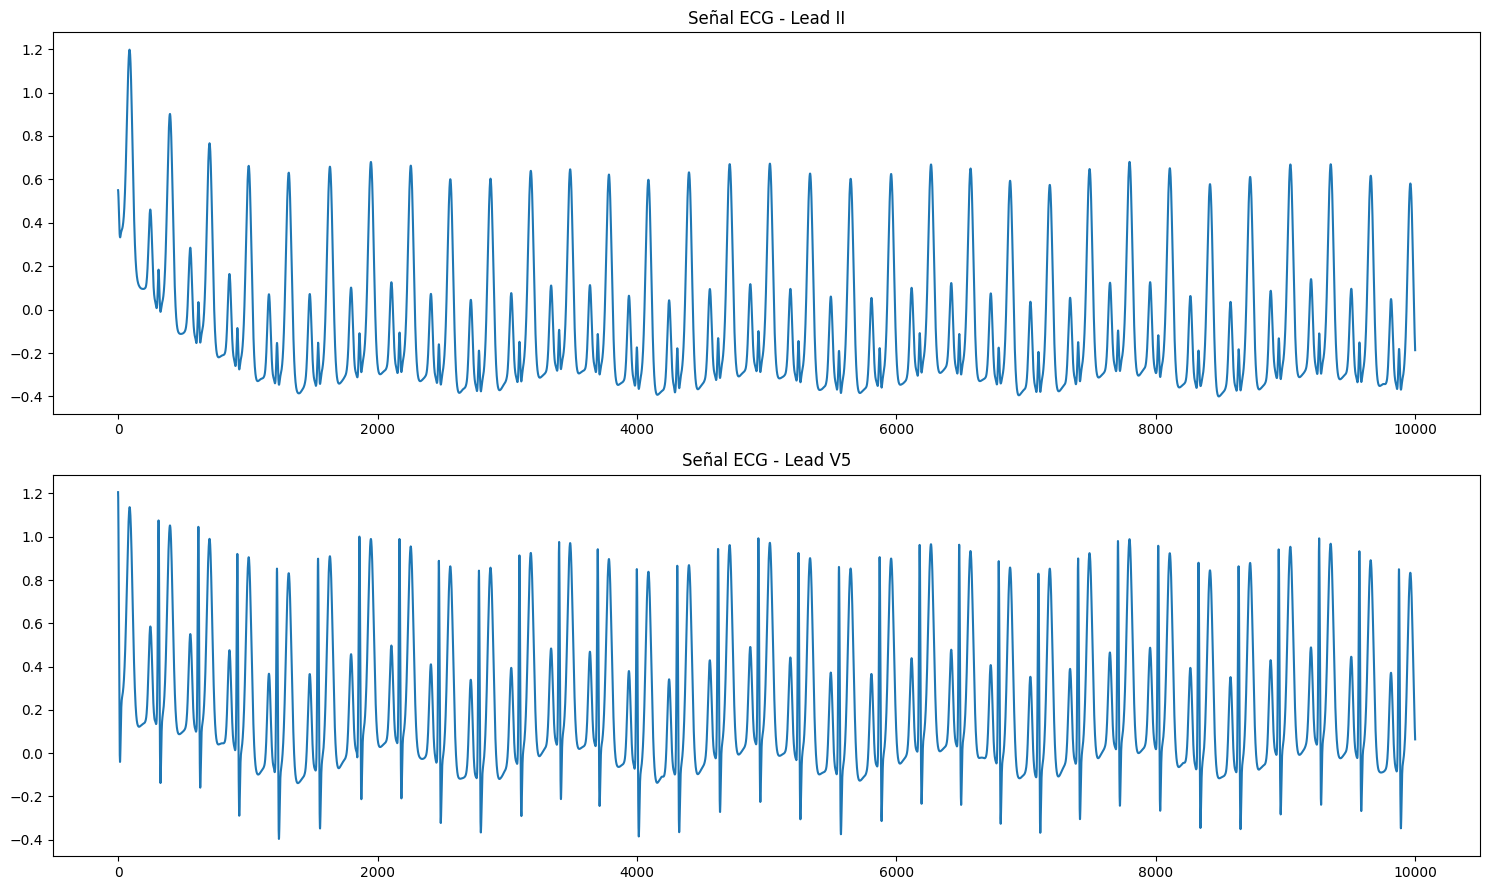

In [48]:
plt.figure(figsize=(15, 9)) 

plt.subplot(2, 1, 1)  # Crea un subplot para la señal II
plt.plot(signal_II[0:10000])  # Ajusta el rango si es necesario
plt.title("Señal ECG - Lead II")

plt.subplot(2, 1, 2)  # Crea un subplot para la señal V5
plt.plot(signal_V5[0:10000]) # Ajusta el rango si es necesario
plt.title("Señal ECG - Lead V5")

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()

Guardar el archivo en una carpeta nueva cada vez que ejecute el programa

In [49]:
"""
import os

savePath = "C:/Users/Documents/"  # Tu ruta base
folder_num = 1

while True:
    folder_name = f"Folder{folder_num}"
    full_path = os.path.join(savePath, folder_name)
    
    if not os.path.exists(full_path):  # Verifica si la carpeta ya existe
        os.makedirs(full_path)  # Crea la carpeta si no existe
        break  # Sale del bucle si la carpeta se creó correctamente
    
    folder_num += 1  # Incrementa el contador si la carpeta ya existe

df.to_csv(f"{full_path}/test.csv", index=False)
"""

'\nimport os\n\nsavePath = "C:/Users/Documents/"  # Tu ruta base\nfolder_num = 1\n\nwhile True:\n    folder_name = f"Folder{folder_num}"\n    full_path = os.path.join(savePath, folder_name)\n    \n    if not os.path.exists(full_path):  # Verifica si la carpeta ya existe\n        os.makedirs(full_path)  # Crea la carpeta si no existe\n        break  # Sale del bucle si la carpeta se creó correctamente\n    \n    folder_num += 1  # Incrementa el contador si la carpeta ya existe\n\ndf.to_csv(f"{full_path}/test.csv", index=False)\n'

In [50]:
""""
import os
import datetime

savePath = "C:/Users/Documents/"  # Tu ruta base
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")  # Obtiene la fecha y hora actual
folder_name = f"Run_{timestamp}"
full_path = os.path.join(savePath, folder_name)

os.makedirs(full_path, exist_ok=True)  # Crea la carpeta

df.to_csv(f"{full_path}/test.csv", index=False)
"""

'"\nimport os\nimport datetime\n\nsavePath = "C:/Users/Documents/"  # Tu ruta base\ntimestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")  # Obtiene la fecha y hora actual\nfolder_name = f"Run_{timestamp}"\nfull_path = os.path.join(savePath, folder_name)\n\nos.makedirs(full_path, exist_ok=True)  # Crea la carpeta\n\ndf.to_csv(f"{full_path}/test.csv", index=False)\n'

In [51]:
"""
import os

savePath = "C:/Users/Documents/"  # Tu ruta base
folder_num = 1

while True:
    folder_name = f"Folder {folder_num}" # Nombre de la carpeta con espacio
    full_path = os.path.join(savePath, folder_name)

    if not os.path.exists(full_path):  
        os.makedirs(full_path)  
        break  
    
    folder_num += 1  

df.to_csv(f'"{full_path}/test.csv"', index=False)  # Ruta entre comillas dobles
"""

'\nimport os\n\nsavePath = "C:/Users/Documents/"  # Tu ruta base\nfolder_num = 1\n\nwhile True:\n    folder_name = f"Folder {folder_num}" # Nombre de la carpeta con espacio\n    full_path = os.path.join(savePath, folder_name)\n\n    if not os.path.exists(full_path):  \n        os.makedirs(full_path)  \n        break  \n    \n    folder_num += 1  \n\ndf.to_csv(f\'"{full_path}/test.csv"\', index=False)  # Ruta entre comillas dobles\n'

Sí, absolutamente. En lugar de usar la señal simulada ecg_signal generada por nk.ecg_simulate(), puedes utilizar un dataset real de una señal de ECG almacenada en un archivo CSV.

Pasos para usar un dataset en lugar de la simulación:

Importar el dataset:

In [ ]:
import pandas as pd
   
ecg_data = pd.read_csv("ruta/a/tu/archivo.csv")  # Reemplaza con la ruta real

Asegúrate de que el archivo CSV tenga una columna con los valores de la señal de ECG.

Extraer la señal:

In [ ]:
ecg_signal = ecg_data["nombre_de_la_columna_ecg"].values  # Reemplaza con el nombre real

Esto te dará un array NumPy con los valores de la señal de ECG.

Procesar la señal: Ahora puedes usar ecg_signal en el resto de tu código para procesarla con NeuroKit, de la misma manera que lo hacías con la señal simulada.

In [ ]:
signals, info = nk.ecg_process(ecg_signal, sampling_rate=360)  
   # ... (resto del código) ...

Consideraciones importantes:

* Formato del archivo CSV: Asegúrate de que el archivo CSV esté formateado correctamente y que la columna con la señal de ECG tenga el tipo de dato adecuado (generalmente numérico).
* Frecuencia de muestreo: Ajusta el parámetro sampling_rate en nk.ecg_process() a la frecuencia de muestreo real del dataset.
* Nombres de columnas: Si el archivo CSV tiene varias columnas, asegúrate de usar el nombre correcto de la columna que contiene la señal de ECG al extraerla con ecg_data["nombre_de_la_columna_ecg"].values.
* Preprocesamiento: Dependiendo de la calidad del dataset, es posible que necesites realizar algún preprocesamiento de la señal antes de usarla con NeuroKit, como filtrar el ruido o eliminar artefactos.

Ejemplo:

Si tu archivo CSV se llama "ecg_dataset.csv" y la columna con la señal de ECG se llama "ECG", el código quedaría así:

In [ ]:
import pandas as pd
import neurokit2 as nk

ecg_data = pd.read_csv("ecg_dataset.csv")
ecg_signal = ecg_data["ECG"].values

signals, info = nk.ecg_process(ecg_signal, sampling_rate=360)  
# ... (resto del código) ...

Siguiendo estos pasos, podrás utilizar tu propio dataset de ECG en lugar de la señal simulada, y aplicar el procesamiento y análisis de NeuroKit a tus datos reales.

¡Espero que esto te ayude a trabajar con tu dataset! Si tienes más preguntas, no dudes en preguntar. 😉